The underlying purpose of this exercise is to first design a neural network without the use of callbacks, which will lead to intentional overfitting to the training data initially. Then with the use of EarlyStopping and Dropouts we will see the benefit of such techniques in preventing overfitting and of getting a better model.

In [1]:
# Import modules.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read in data file.
df = pd.read_csv('cancer_classification.csv')

In [3]:
# Get an early look at the data and perform basic analysis.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


The label we will be trying to predict is 'benign_0_mal_1', this is a classification of a tumor being either benign or malignant in nature based on the features inputted.We will have a look at the count of either in the data set to ensure a fairly balanced occurance. We will also look at the correlations between features and the labe.

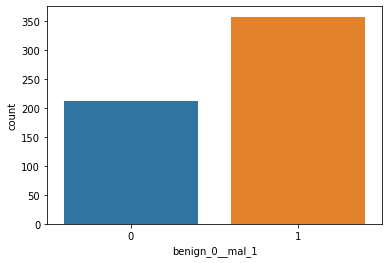

In [7]:
sns.countplot(x = 'benign_0__mal_1',data=df)

In [8]:
df.corr()['benign_0__mal_1'].sort_values

<bound method Series.sort_values of mean radius               -0.730029
mean texture              -0.415185
mean perimeter            -0.742636
mean area                 -0.708984
mean smoothness           -0.358560
mean compactness          -0.596534
mean concavity            -0.696360
mean concave points       -0.776614
mean symmetry             -0.330499
mean fractal dimension     0.012838
radius error              -0.567134
texture error              0.008303
perimeter error           -0.556141
area error                -0.548236
smoothness error           0.067016
compactness error         -0.292999
concavity error           -0.253730
concave points error      -0.408042
symmetry error             0.006522
fractal dimension error   -0.077972
worst radius              -0.776454
worst texture             -0.456903
worst perimeter           -0.782914
worst area                -0.733825
worst smoothness          -0.421465
worst compactness         -0.590998
worst concavity           -0

Setting up our data into train/test parts, creating our model, training it and evaluating it initially.

In [9]:
# Declare and initialize X and y variables
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [11]:
# Perform the train/test split.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25, random_state = 101)

In [12]:
# Scale the data.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# Create and train our model.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()

model.add(Dense(30,activation = 'relu'))
model.add(Dense(15,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 735us/sample - loss: 0.6527 - val_loss: 0.6300
Epoch 2/600
426/426 [==============================] - 0s 33us/sample - loss: 0.6142 - val_loss: 0.5978
Epoch 3/600
426/426 [==============================] - 0s 35us/sample - loss: 0.5809 - val_loss: 0.5636
Epoch 4/600
426/426 [==============================] - 0s 38us/sample - loss: 0.5424 - val_loss: 0.5202
Epoch 5/600
426/426 [==============================] - 0s 35us/sample - loss: 0.5013 - val_loss: 0.4765
Epoch 6/600
426/426 [==============================] - 0s 35us/sample - loss: 0.4624 - val_loss: 0.4387
Epoch 7/600
426/426 [==============================] - 0s 35us/sample - loss: 0.4206 - val_loss: 0.4024
Epoch 8/600
426/426 [==============================] - 0s 35us/sample - loss: 0.3895 - val_loss: 0.3648
Epoch 9/600
426/426 [======

426/426 [==============================] - 0s 33us/sample - loss: 0.0519 - val_loss: 0.1153
Epoch 76/600
426/426 [==============================] - 0s 33us/sample - loss: 0.0529 - val_loss: 0.1186
Epoch 77/600
426/426 [==============================] - 0s 33us/sample - loss: 0.0546 - val_loss: 0.1165
Epoch 78/600
426/426 [==============================] - 0s 35us/sample - loss: 0.0533 - val_loss: 0.1145
Epoch 79/600
426/426 [==============================] - 0s 33us/sample - loss: 0.0534 - val_loss: 0.1166
Epoch 80/600
426/426 [==============================] - 0s 33us/sample - loss: 0.0500 - val_loss: 0.1212
Epoch 81/600
426/426 [==============================] - 0s 33us/sample - loss: 0.0521 - val_loss: 0.1171
Epoch 82/600
426/426 [==============================] - 0s 33us/sample - loss: 0.0514 - val_loss: 0.1197
Epoch 83/600
426/426 [==============================] - 0s 35us/sample - loss: 0.0539 - val_loss: 0.1219
Epoch 84/600
426/426 [==============================] - 0s 31us/samp

426/426 [==============================] - 0s 33us/sample - loss: 0.0394 - val_loss: 0.1466
Epoch 153/600
426/426 [==============================] - 0s 33us/sample - loss: 0.0413 - val_loss: 0.1424
Epoch 154/600
426/426 [==============================] - 0s 33us/sample - loss: 0.0497 - val_loss: 0.1448
Epoch 155/600
426/426 [==============================] - 0s 33us/sample - loss: 0.0400 - val_loss: 0.1380
Epoch 156/600
426/426 [==============================] - 0s 31us/sample - loss: 0.0378 - val_loss: 0.1495
Epoch 157/600
426/426 [==============================] - 0s 33us/sample - loss: 0.0385 - val_loss: 0.1438
Epoch 158/600
426/426 [==============================] - 0s 33us/sample - loss: 0.0393 - val_loss: 0.1416
Epoch 159/600
426/426 [==============================] - 0s 31us/sample - loss: 0.0374 - val_loss: 0.1428
Epoch 160/600
426/426 [==============================] - 0s 33us/sample - loss: 0.0380 - val_loss: 0.1445
Epoch 161/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 33us/sample - loss: 0.0306 - val_loss: 0.1757
Epoch 230/600
426/426 [==============================] - 0s 31us/sample - loss: 0.0308 - val_loss: 0.1638
Epoch 231/600
426/426 [==============================] - 0s 33us/sample - loss: 0.0298 - val_loss: 0.1653
Epoch 232/600
426/426 [==============================] - 0s 33us/sample - loss: 0.0310 - val_loss: 0.1723
Epoch 233/600
426/426 [==============================] - 0s 33us/sample - loss: 0.0309 - val_loss: 0.1722
Epoch 234/600
426/426 [==============================] - 0s 31us/sample - loss: 0.0306 - val_loss: 0.1642
Epoch 235/600
426/426 [==============================] - 0s 33us/sample - loss: 0.0310 - val_loss: 0.1720
Epoch 236/600
426/426 [==============================] - 0s 31us/sample - loss: 0.0314 - val_loss: 0.1672
Epoch 237/600
426/426 [==============================] - 0s 33us/sample - loss: 0.0328 - val_loss: 0.1738
Epoch 238/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 31us/sample - loss: 0.0239 - val_loss: 0.1928
Epoch 307/600
426/426 [==============================] - 0s 33us/sample - loss: 0.0229 - val_loss: 0.2027
Epoch 308/600
426/426 [==============================] - 0s 33us/sample - loss: 0.0213 - val_loss: 0.1804
Epoch 309/600
426/426 [==============================] - 0s 33us/sample - loss: 0.0293 - val_loss: 0.2247
Epoch 310/600
426/426 [==============================] - 0s 33us/sample - loss: 0.0277 - val_loss: 0.1842
Epoch 311/600
426/426 [==============================] - 0s 31us/sample - loss: 0.0220 - val_loss: 0.1964
Epoch 312/600
426/426 [==============================] - 0s 33us/sample - loss: 0.0217 - val_loss: 0.1803
Epoch 313/600
426/426 [==============================] - 0s 33us/sample - loss: 0.0255 - val_loss: 0.2046
Epoch 314/600
426/426 [==============================] - 0s 33us/sample - loss: 0.0239 - val_loss: 0.1920
Epoch 315/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 33us/sample - loss: 0.0187 - val_loss: 0.2150
Epoch 384/600
426/426 [==============================] - 0s 33us/sample - loss: 0.0243 - val_loss: 0.2047
Epoch 385/600
426/426 [==============================] - 0s 33us/sample - loss: 0.0174 - val_loss: 0.2418
Epoch 386/600
426/426 [==============================] - 0s 33us/sample - loss: 0.0230 - val_loss: 0.2074
Epoch 387/600
426/426 [==============================] - 0s 33us/sample - loss: 0.0167 - val_loss: 0.2219
Epoch 388/600
426/426 [==============================] - 0s 31us/sample - loss: 0.0172 - val_loss: 0.2153
Epoch 389/600
426/426 [==============================] - 0s 31us/sample - loss: 0.0176 - val_loss: 0.2196
Epoch 390/600
426/426 [==============================] - 0s 33us/sample - loss: 0.0174 - val_loss: 0.2231
Epoch 391/600
426/426 [==============================] - 0s 33us/sample - loss: 0.0155 - val_loss: 0.2233
Epoch 392/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 33us/sample - loss: 0.0123 - val_loss: 0.2856
Epoch 461/600
426/426 [==============================] - 0s 31us/sample - loss: 0.0122 - val_loss: 0.2369
Epoch 462/600
426/426 [==============================] - 0s 35us/sample - loss: 0.0164 - val_loss: 0.3146
Epoch 463/600
426/426 [==============================] - 0s 33us/sample - loss: 0.0178 - val_loss: 0.2494
Epoch 464/600
426/426 [==============================] - 0s 31us/sample - loss: 0.0101 - val_loss: 0.2590
Epoch 465/600
426/426 [==============================] - 0s 33us/sample - loss: 0.0105 - val_loss: 0.2514
Epoch 466/600
426/426 [==============================] - 0s 31us/sample - loss: 0.0107 - val_loss: 0.2482
Epoch 467/600
426/426 [==============================] - 0s 31us/sample - loss: 0.0107 - val_loss: 0.2556
Epoch 468/600
426/426 [==============================] - 0s 33us/sample - loss: 0.0112 - val_loss: 0.2631
Epoch 469/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 33us/sample - loss: 0.0072 - val_loss: 0.2873
Epoch 538/600
426/426 [==============================] - 0s 33us/sample - loss: 0.0072 - val_loss: 0.3033
Epoch 539/600
426/426 [==============================] - 0s 31us/sample - loss: 0.0078 - val_loss: 0.2835
Epoch 540/600
426/426 [==============================] - 0s 33us/sample - loss: 0.0076 - val_loss: 0.3155
Epoch 541/600
426/426 [==============================] - 0s 33us/sample - loss: 0.0090 - val_loss: 0.2806
Epoch 542/600
426/426 [==============================] - 0s 31us/sample - loss: 0.0086 - val_loss: 0.2988
Epoch 543/600
426/426 [==============================] - 0s 31us/sample - loss: 0.0076 - val_loss: 0.3168
Epoch 544/600
426/426 [==============================] - 0s 33us/sample - loss: 0.0092 - val_loss: 0.2778
Epoch 545/600
426/426 [==============================] - 0s 31us/sample - loss: 0.0085 - val_loss: 0.3238
Epoch 546/600
426/426 [==============================] - ETA

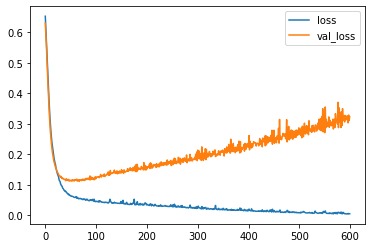

In [15]:
# Check how the losses changed over the training.
losses = pd.DataFrame(model.history.history)
losses.plot()

The plot above shows the loss and validation loss initially falling together, but then there's a seperation and a return to a rising loss in the validation data. This is a tell tale sign of overfitting to the training data.

In [18]:
# Re-defining the model and making use of callbacks.
model = Sequential()

model.add(Dense(30,activation = 'relu'))
model.add(Dense(15,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')



from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss',mode='min',verbose=1,patience=25)

model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 547us/sample - loss: 0.6486 - val_loss: 0.6312
Epoch 2/600
426/426 [==============================] - 0s 38us/sample - loss: 0.6086 - val_loss: 0.5927
Epoch 3/600
426/426 [==============================] - 0s 33us/sample - loss: 0.5697 - val_loss: 0.5506
Epoch 4/600
426/426 [==============================] - 0s 38us/sample - loss: 0.5268 - val_loss: 0.5034
Epoch 5/600
426/426 [==============================] - 0s 35us/sample - loss: 0.4806 - val_loss: 0.4544
Epoch 6/600
426/426 [==============================] - 0s 35us/sample - loss: 0.4358 - val_loss: 0.4104
Epoch 7/600
426/426 [==============================] - 0s 35us/sample - loss: 0.3918 - val_loss: 0.3648
Epoch 8/600
426/426 [==============================] - 0s 33us/sample - loss: 0.3557 - val_loss: 0.3242
Epoch 9/600
426/426 [==============================] - 0s 35us/sample - loss: 0.3171 - val_loss: 0.2905
Epoch 10/600
426/

426/426 [==============================] - 0s 35us/sample - loss: 0.0598 - val_loss: 0.1095
Epoch 79/600
426/426 [==============================] - 0s 35us/sample - loss: 0.0561 - val_loss: 0.1105
Epoch 80/600
426/426 [==============================] - 0s 33us/sample - loss: 0.0542 - val_loss: 0.1129
Epoch 81/600
426/426 [==============================] - 0s 31us/sample - loss: 0.0523 - val_loss: 0.1066
Epoch 82/600
426/426 [==============================] - 0s 35us/sample - loss: 0.0531 - val_loss: 0.1137
Epoch 83/600
426/426 [==============================] - 0s 31us/sample - loss: 0.0544 - val_loss: 0.1078
Epoch 84/600
426/426 [==============================] - 0s 35us/sample - loss: 0.0528 - val_loss: 0.1127
Epoch 85/600
426/426 [==============================] - 0s 33us/sample - loss: 0.0548 - val_loss: 0.1073
Epoch 86/600
426/426 [==============================] - 0s 33us/sample - loss: 0.0588 - val_loss: 0.1106
Epoch 87/600
426/426 [==============================] - 0s 33us/samp

The model ran again and attempted to run all 600 epochs. However with the callbacks we set the EarlyStopping to monitor validation loss and to keep it to minimum loss, patience was set to 25 so the model ran another 25 epochs after noticing the need to early stop. We will now re-check the loss effects.

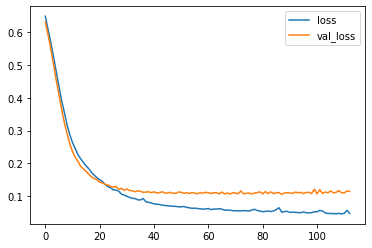

In [19]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

The plot has improved quite a bit with no real increase to val_loss but there still is some seperation in results. We can now see the effects of using Dropouts in our model. This will allow us to randomly switch off neurons within the model.

In [21]:
# Re-define the model again and include dropouts.
model = Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 728us/sample - loss: 0.7157 - val_loss: 0.6828
Epoch 2/600
426/426 [==============================] - 0s 47us/sample - loss: 0.6922 - val_loss: 0.6729
Epoch 3/600
426/426 [==============================] - 0s 40us/sample - loss: 0.6849 - val_loss: 0.6648
Epoch 4/600
426/426 [==============================] - 0s 38us/sample - loss: 0.6621 - val_loss: 0.6532
Epoch 5/600
426/426 [==============================] - 0s 38us/sample - loss: 0.6633 - val_loss: 0.6423
Epoch 6/600
426/426 [==============================] - 0s 40us/sample - loss: 0.6496 - val_loss: 0.6316
Epoch 7/600
426/426 [==============================] - 0s 40us/sample - loss: 0.6274 - val_loss: 0.6179
Epoch 8/600
426/426 [==============================] - 0s 40us/sample - loss: 0.6244 - val_loss: 0.6003
Epoch 9/600
426/426 [==============================] - 0s 38us/sample - loss: 0.6065 - val_loss: 0.5831
Epoch 10/600
426/

426/426 [==============================] - 0s 40us/sample - loss: 0.1902 - val_loss: 0.1002
Epoch 79/600
426/426 [==============================] - 0s 38us/sample - loss: 0.1507 - val_loss: 0.0945
Epoch 80/600
426/426 [==============================] - 0s 38us/sample - loss: 0.1774 - val_loss: 0.0981
Epoch 81/600
426/426 [==============================] - 0s 38us/sample - loss: 0.1641 - val_loss: 0.0937
Epoch 82/600
426/426 [==============================] - 0s 38us/sample - loss: 0.1508 - val_loss: 0.0957
Epoch 83/600
426/426 [==============================] - 0s 38us/sample - loss: 0.1432 - val_loss: 0.0968
Epoch 84/600
426/426 [==============================] - 0s 38us/sample - loss: 0.1631 - val_loss: 0.0882
Epoch 85/600
426/426 [==============================] - 0s 35us/sample - loss: 0.1638 - val_loss: 0.0991
Epoch 86/600
426/426 [==============================] - 0s 38us/sample - loss: 0.1557 - val_loss: 0.0987
Epoch 87/600
426/426 [==============================] - 0s 35us/samp

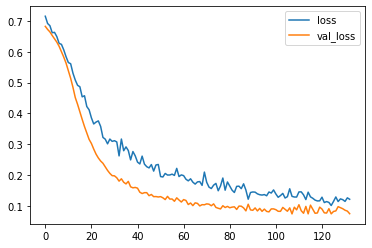

In [22]:
# Check the loss again.
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

In [24]:
# Evaluate the model with test data.
preds = model.predict_classes(X_test)

from sklearn.metrics import classification_report, confusion_matrix

print( classification_report(y_test,preds))
print()
print( confusion_matrix(y_test,preds))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        55
           1       0.99      0.99      0.99        88

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143


[[54  1]
 [ 1 87]]


We can see some very good results here, 98% f1-score for benign and 99% f1-score for malignant classes. The confusion matrix shows 1 wrong prediction.